In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import zscore
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('cleaned_data.csv') 

In [4]:
df.shape

(23315, 31)

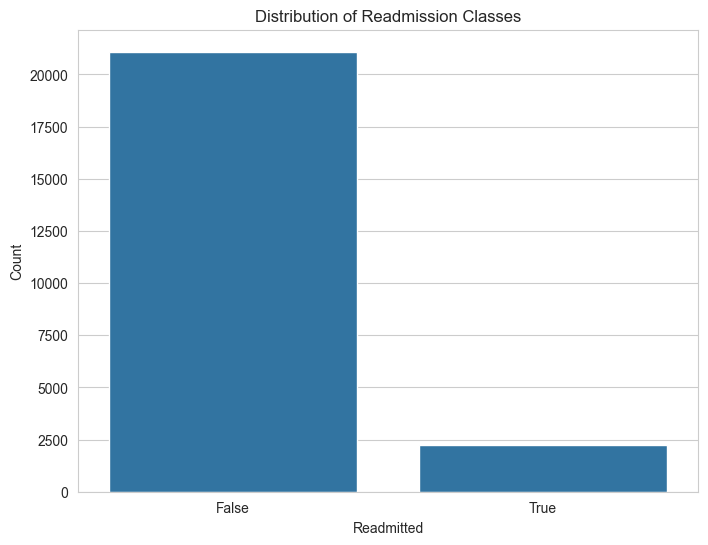

In [5]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of unique classes of the target variable 'readmitted'
plt.figure(figsize=(8, 6))
sns.countplot(x='readmitted', data=df)
plt.title('Distribution of Readmission Classes')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()


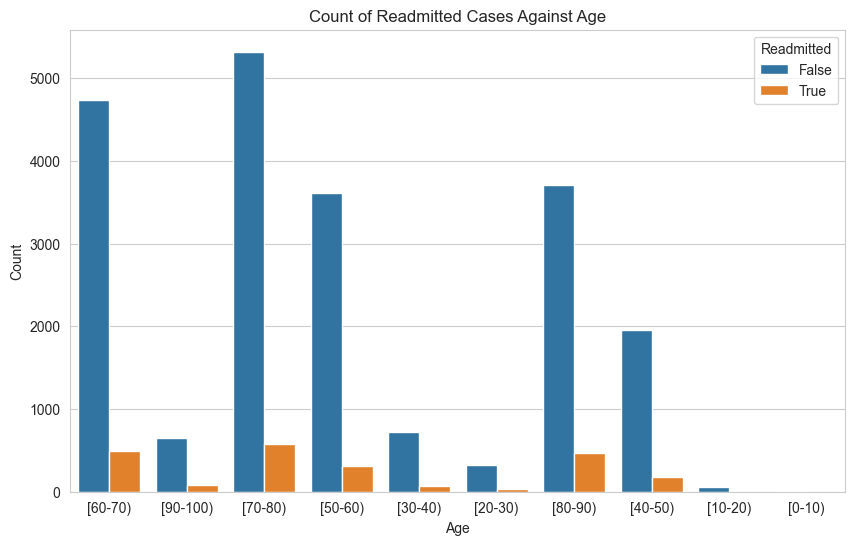

In [6]:
# Plot the count of number of readmitted cases against age
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='readmitted', data=df)
plt.title('Count of Readmitted Cases Against Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Readmitted', loc='upper right')
plt.show()


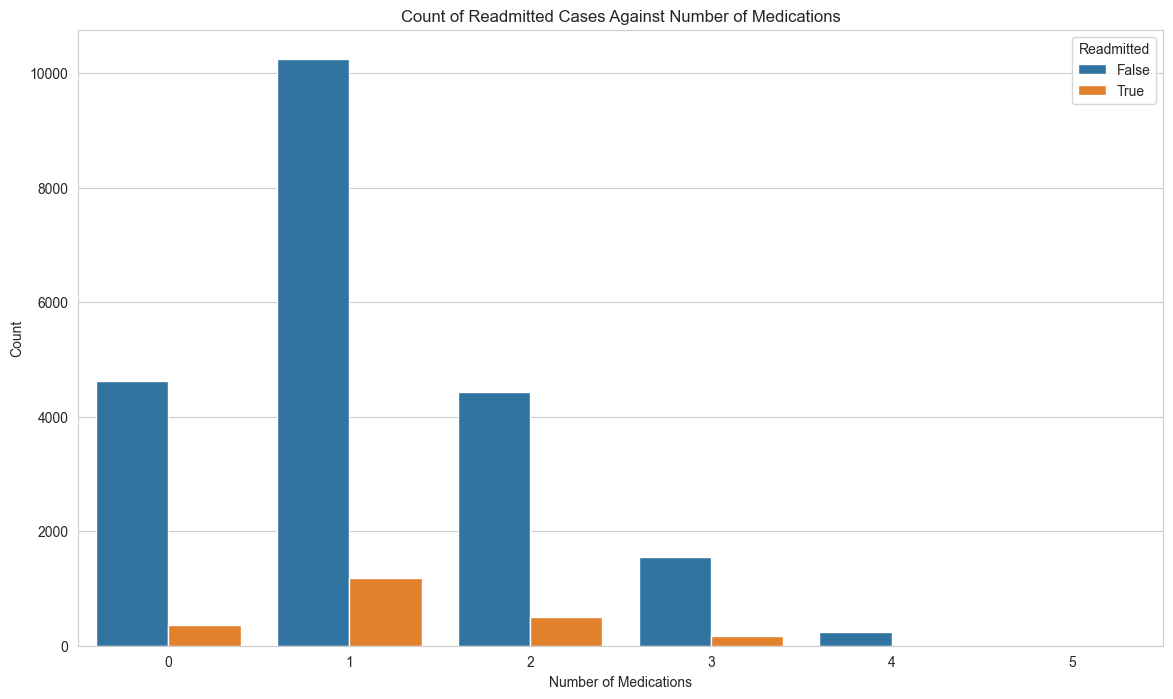

In [8]:

# List of medication columns
med_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
               'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
               'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
               'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
               'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

med_columns = [col for col in med_columns if col in df.columns]
# Create a new column for total medications used
df['total_medications'] = df[med_columns].apply(lambda x: (x != 'No').sum(), axis=1)

# Plotting the count of target variable against the number of medications
plt.figure(figsize=(14, 8))
sns.countplot(x='total_medications', hue='readmitted', data=df)
plt.title('Count of Readmitted Cases Against Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.legend(title='Readmitted', loc='upper right')
plt.show()


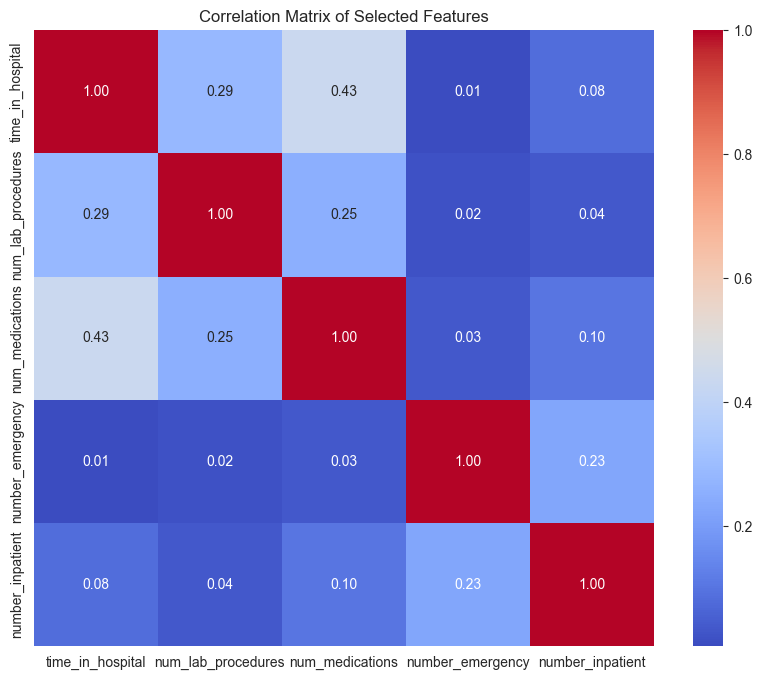

In [10]:
subset_features = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_emergency', 'number_inpatient']  # Adjust this list as per your requirements

# Create the scatter_matrix_df DataFrame with only these features
scatter_matrix_df = df[subset_features]

# Now you can calculate the correlation matrix
correlation_matrix = scatter_matrix_df.corr()

# And then display it using seaborn's heatmap for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()
